## 1. importation des libraris

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## 2. chargement  et exploration de donnees

In [2]:
df = pd.read_csv('data/heart_modif.csv')

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106.0,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   object 
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   978 non-null    float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 112.2+ KB


In [6]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     47
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [7]:
df['chol'].unique()

array(['212', '203', '174', '294', '248', '318', '289', '249', '286',
       '149', '341', '210', '298', '204', '308', '266', '244', '211',
       '185', '223', '208', '252', '209', 'fff', '233', '319', '256',
       '327', '169', '131', '269', '196', '231', '213', '271', '263',
       '229', '360', '258', '330', '342', '226', '228', '278', '230',
       '283', '241', '175', '188', '217', '193', '245', '232', '299',
       '288', '197', '315', '215', '164', '326', '207', '177', '257',
       '255', '187', '201', '220', '268', '267', '236', '303', '282',
       '126', '309', '186', '275', '281', '206', '335', '218', '307',
       '254', '295', '417', '260', '240', '302', '192', '225', '325',
       '235', '274', '234', '182', '167', '172', '321', '300', '199',
       '564', '157', '304', '222', '184', '354', '160', '247', '239',
       '246', '409', '293', '180', '250', '221', '200', '227', '243',
       '311', '261', '242', '205', '306', '219', '353', '198', '394',
       '183', '237',

## 3. visualisation de donnees

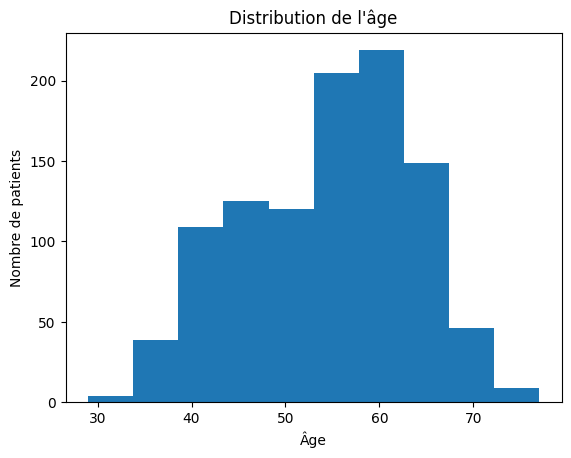

In [8]:
plt.figure()
plt.hist(df['age'], bins=10)
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.title("Distribution de l'âge")
plt.show()


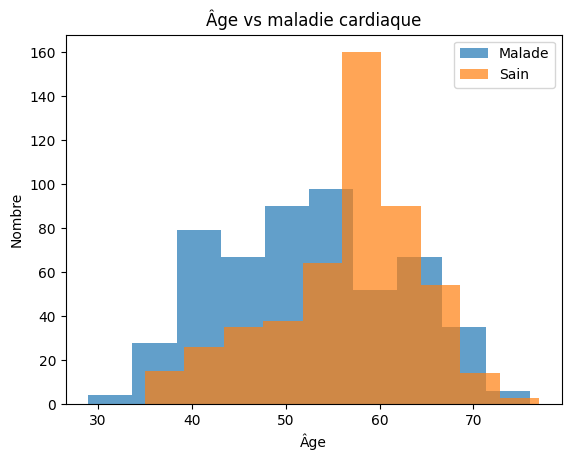

In [9]:
plt.figure()
plt.hist(df[df['target'] == 1]['age'], bins=10, alpha=0.7, label='Malade')
plt.hist(df[df['target'] == 0]['age'], bins=10, alpha=0.7, label='Sain')
plt.xlabel("Âge")
plt.ylabel("Nombre")
plt.title("Âge vs maladie cardiaque")
plt.legend()
plt.show()


## 4. traitement des donnees

In [10]:
df['chol']= pd.to_numeric(df['chol'], errors='coerce')

In [11]:
df['chol'].dtype

dtype('float64')

In [12]:
df['chol'].isnull().sum() 

1

In [13]:
df['chol']=df['chol'].fillna(df['chol'].median()) 

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62,0,0,138,294.0,1,1,106.0,0,1.9,1,3,2,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   978 non-null    float64
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 112.2 KB


In [16]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     47
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [17]:
df['thalach']=df['thalach'].fillna(df['thalach'].median())  

In [18]:
df['thalach'].isna().sum()    

0

## 5. pre-traitement et standarisation de donnees

In [19]:
x = df.drop(columns='target')
y = df['target']

In [20]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [21]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [22]:
scaler = StandardScaler()

In [23]:
x_scaled = scaler.fit_transform(x)

## 6. separation des donnees d'entrainement et de test

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## 7. entrainement du model 

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [27]:
y_pred = model.predict(x_test)

## 8. evaluation du model

In [28]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)

Accuracy: 0.7951219512195122


## 9. Test

In [36]:
patient = np.array([[23, 1, 2, 130, 250, 0, 1, 150, 0, 1.5, 1, 0, 2]])

patient2 = np.array([[30, 0, 3, 170, 250, 1, 1, 170, 1, 1.8, 1, 1, 3]])
patient_scaled = scaler.transform(patient2)
prediction = model.predict(patient_scaled)

print("Maladie cardiaque :", "Oui" if prediction[0] == 1 else "Non")

Maladie cardiaque : Oui


C:\Users\vanng\miniconda3\envs\new_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 10. enregistrement du model

In [30]:
import pickle

In [31]:
with open('heart_disease_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [32]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)